# Tesorflow M1 MacBook お試し

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## y = 2 * x + 1 の簡単な回帰でfittingをデモ

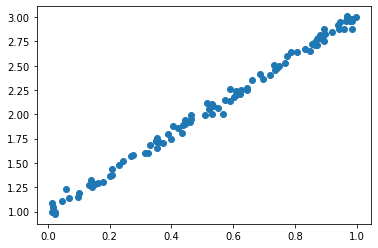

In [2]:
n_sample = 100
dataset_x = np.random.rand(n_sample)
dataset_y = 2 * dataset_x + 1 + np.random.normal(0, 0.05, n_sample) # ちょこっとノイズ加える
# plot
plt.scatter(dataset_x, dataset_y)

## 自動微分を使って重みパラメータをfitting

w = [[1.75216404]], b = [[1.14888086]], loss = 0.8518444412697204


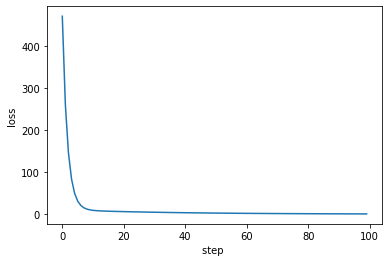

In [3]:
w = tf.Variable(np.zeros([1,1])) # fottingしたい変数
b = tf.Variable(np.zeros([1,1])) # あらかじめ正しい値を入れておく
x = tf.constant(dataset_x)
loss_log = [] # lossの推移記録用
n_step = 100 # 学習回数
for i in range(n_step):
    with tf.GradientTape() as t:
        t.watch(x) # tf.constantはwatachが必要らしい
        y = w * x + b # object function
        loss = tf.reduce_sum(tf.multiply(y - dataset_y, y - dataset_y)) # loss function
    # 元の入力テンソル w, b に対する loss の微分
    dloss_dparams = t.gradient(loss, [w, b]) # 自動微分
    w = tf.Variable(tf.subtract(w, dloss_dparams[0] * 0.001)) # 値の更新
    b = tf.Variable(tf.subtract(b, dloss_dparams[1] * 0.001)) # 値の更新
    loss_log.append(loss)
    #print(f'step {i + 1}: w = {w.numpy()}, b = {b.numpy()}, loss = {loss}')
# loss の推移を確認
print(f'w = {w.numpy()}, b = {b.numpy()}, loss = {loss}')
plt.plot([i for i in range(n_step)], loss_log)
plt.xlabel('step ')
plt.ylabel('loss')
plt.show()

## Optimizerを使用したパラメータの自動更新

`tf.keras.optimizers`から使用できる。今回はSGDを使用

w = [[1.75216406]], b = [[1.14888085]], loss = 0.8518443511729884


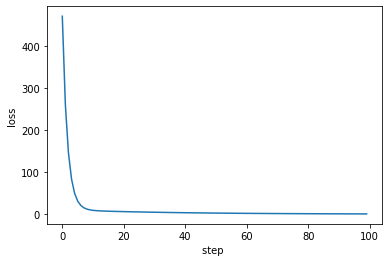

In [4]:
w = tf.Variable(np.zeros([1,1])) # fottingしたい変数
b = tf.Variable(np.zeros([1,1])) # あらかじめ正しい値を入れておく
# optimizerの定義
opt = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0)
x = tf.constant(dataset_x)
loss_log = [] # lossの推移記録用
n_step = 100 # 学習回数
for i in range(n_step):
    with tf.GradientTape() as t:
        t.watch(x) # tf.constantはwatachが必要らしい
        y = w * x + b # object function
        loss = tf.reduce_sum(tf.multiply(y - dataset_y, y - dataset_y)) # loss function
    # 元の入力テンソル w, b に対する loss の微分
    dloss_dparams = t.gradient(loss, [w, b]) # 自動微分
    # 微分結果を元に重み修正
    opt.apply_gradients(zip(dloss_dparams, [w, b]))
    loss_log.append(loss)
    
    #print(f'step {i + 1}: w = {w.numpy()}, b = {b.numpy()}, loss = {loss}')
# loss の推移を確認
print(f'w = {w.numpy()}, b = {b.numpy()}, loss = {loss}')
plt.plot([i for i in range(n_step)], loss_log)
plt.xlabel('step ')
plt.ylabel('loss')
plt.show()